In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
from sqlalchemy import create_engine
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(11.7, 8.27)})

In [4]:
pwd()

'/Users/g9385/code/music-streaming/notebooks'

In [5]:
e = create_engine('sqlite:///../data/processed/music.db', echo=False)

In [6]:
sql_daily_listens = """
SELECT
    DATE(listened_at) AS listened_at
    , count(distinct(artist_id)) AS artists
    , count(distinct(user_id)) AS users
    , count(*) AS listens
    , count(*) * 3.28 AS listen_minutes
FROM fact_listen
GROUP BY
    DATE(listened_at);
"""

In [7]:
df_daily_listens = pd.read_sql_query(sql_daily_listens, e)
df_daily_listens.head()

,listened_at,artists,users,listens,listen_minutes
0,2019-01-01,1048,72,2405,7888.40
1,2019-01-02,1359,78,3287,10781.36
2,2019-01-03,1612,82,3612,11847.36
3,2019-01-04,1427,82,3307,10846.96
4,2019-01-05,1056,71,2520,8265.60


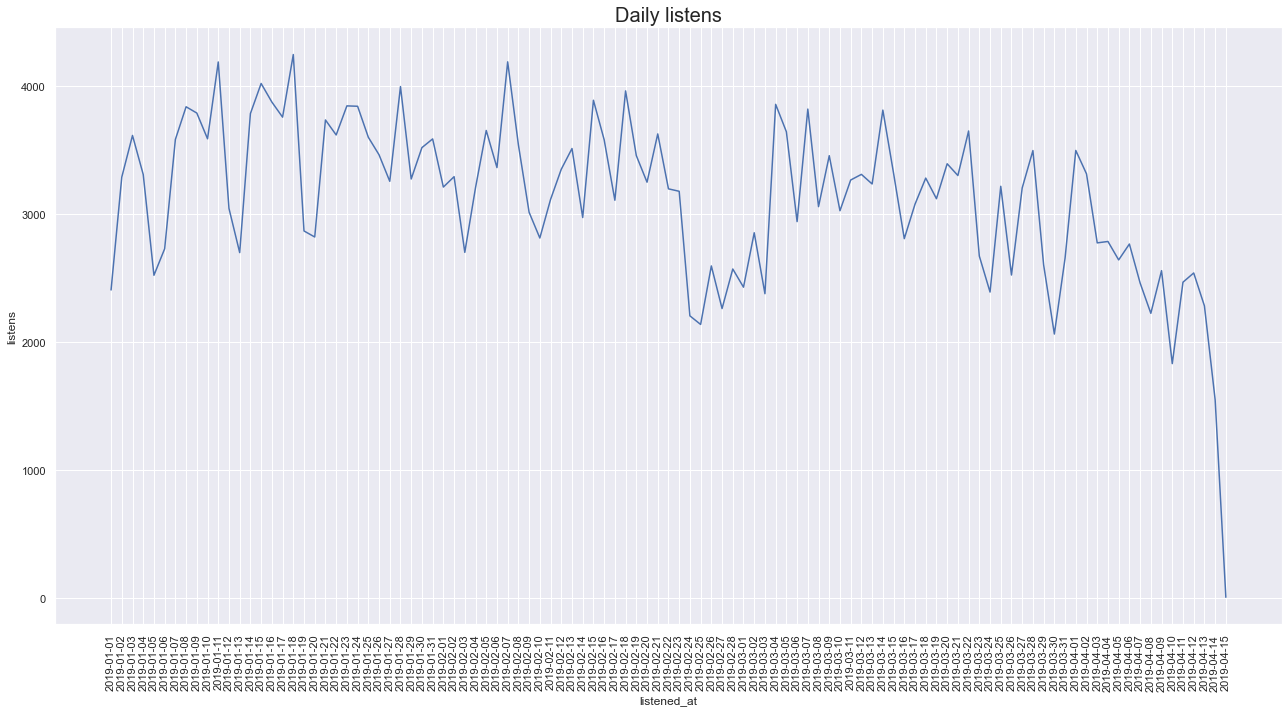

In [8]:
fig, ax = plt.subplots(figsize=(18,10))
ax.set_title("Daily listens", fontsize=20, fontweight=3)
#ax.set(xlabel="feature_1mean", ylabel="feature_2mean")
sns.lineplot(x="listened_at", y="listens", data=df_daily_listens, ax=ax)
plt.xticks(rotation=90)
#ax.legend()
fig.tight_layout()

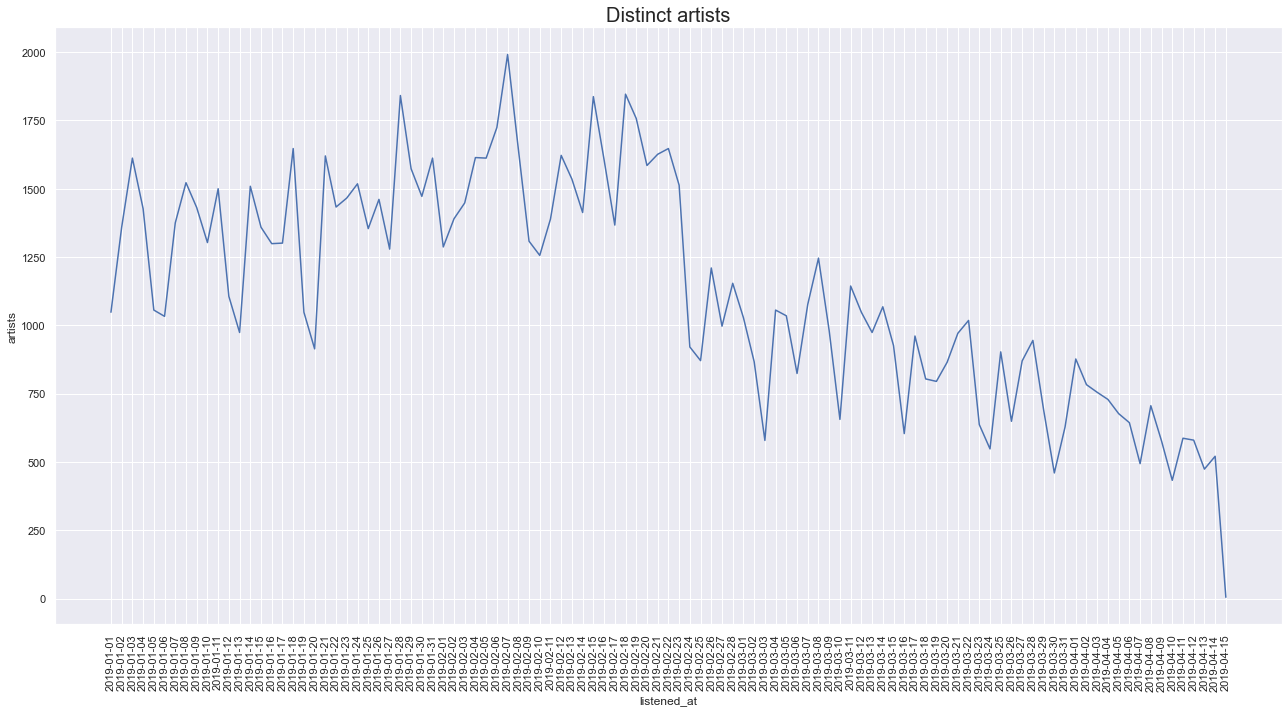

In [9]:
fig, ax = plt.subplots(figsize=(18,10))
ax.set_title("Distinct artists", fontsize=20, fontweight=3)
#ax.set(xlabel="feature_1mean", ylabel="feature_2mean")
sns.lineplot(x="listened_at", y="artists", data=df_daily_listens, ax=ax)
plt.xticks(rotation=90)
#ax.legend()
fig.tight_layout()

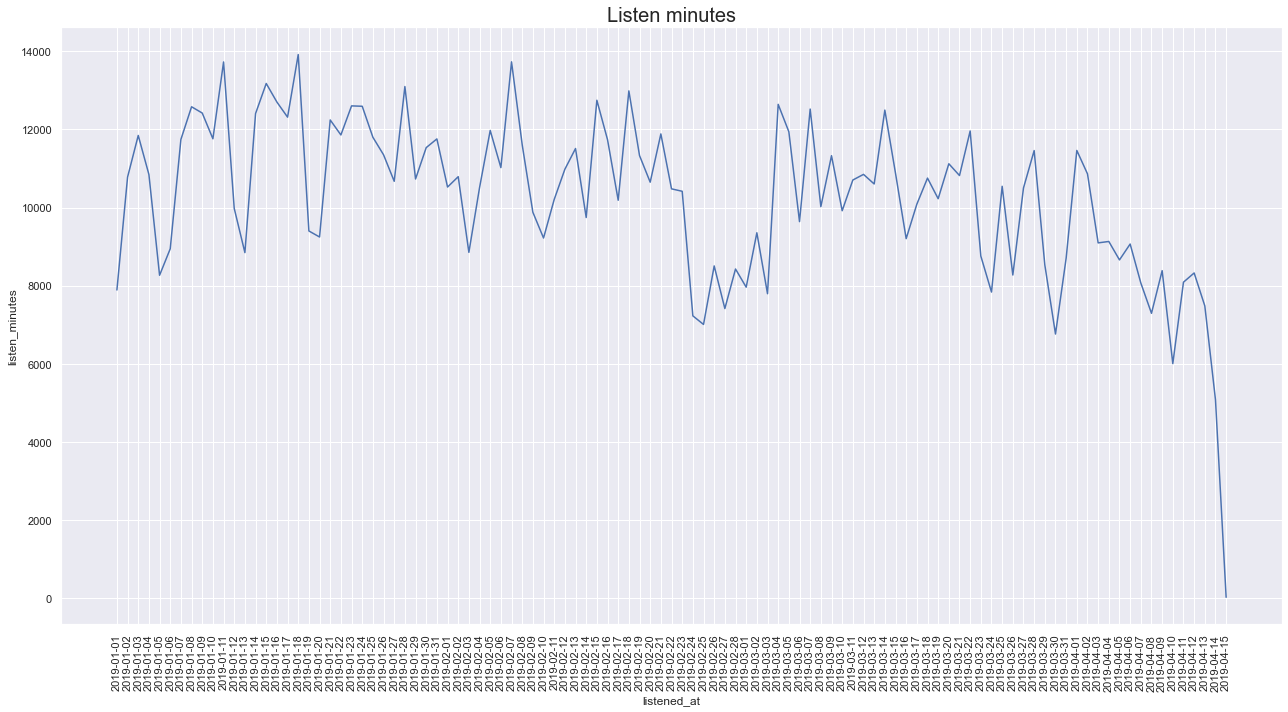

In [10]:
fig, ax = plt.subplots(figsize=(18,10))
ax.set_title("Listen minutes", fontsize=20, fontweight=3)
#ax.set(xlabel="feature_1mean", ylabel="feature_2mean")
sns.lineplot(x="listened_at", y="listen_minutes", data=df_daily_listens, ax=ax)
plt.xticks(rotation=90)
#ax.legend()
fig.tight_layout()

In [11]:
sql_kpi = """
WITH avg_plays AS (
    SELECT
        round(avg(total_plays), 2) AS avg_total_daily_plays
        , round(avg(total_play_minutes), 2) AS avg_total_daily_minutes
    FROM(
        SELECT
            count(*) AS total_plays
            , count(*) * 3.28 AS total_play_minutes
        FROM fact_listen
        GROUP BY
            date(listened_at)
    )
)
SELECT
    count(*) AS total_plays
    , count(*) * 3.28 AS total_play_minuntes
    , avg_plays.avg_total_daily_plays
    , avg_plays.avg_total_daily_minutes
FROM fact_listen
INNER JOIN avg_plays ON (1=1);
"""

In [12]:
df_kpi = pd.read_sql_query(sql_kpi, e)
df_kpi.head()

,total_plays,total_play_minuntes,avg_total_daily_plays,avg_total_daily_minutes
0,328010,1075872.8,3123.9,10246.41


## Missing KPIs

* New & lost subscribers
* Average revenue per user
* Customer lifetime value